$$ f(x) = ln(x+1) $$

**1) Animación con Sagemath**



```python
# Interact Taylor Series of $$f(x) = ln(x+1)$$
# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -20, 20, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -20, 20, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=10)

# Animate  Taylor Series of $$f(x) = ln(x+1)$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = ln(x+1)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('ln(x+1)_taylor_animation_1.gif')
```



![Sage Image](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab9/images/ln(x+1)_taylor_animation_1.gif?raw=true)

**2) Evaluación del error**

## Taylor series of $ln(x+1)$

$$ ln(x+1) = \sum_{n=0}^{\infty} (-1)^{n} \frac{x^{n+1}}{n+1} $$

What is value of the partial Taylor series of $ln(x+1)$ up to the  $n$-th term of $ln(x+1)$ about $0$ (Maclaurin  series) for $x=1/2$

In [17]:
# ∑_{i=1}^n  (-1)^(i) * x^(i+1) / (i+1)
import math

n = 10
x = 0.5
result = 0
for i in range(n+1):
    result += (-1)**(i) * ( x ** (i+1) ) / ( i+1 ) 
    #print("i =",i,"->",(-1)**(i) * ( x ** (i+1) ) / ( i+1 ) )
    print('ln(x+1) ≈ ∑_{i=0}^ (-1)^'+str(i)+' (-1)^i * x^(i+1) / (i+1)',' = ',result )  
print("result = ",result)
print('math.log(x+1) = ',math.log(x+1))

ln(x+1) ≈ ∑_{i=0}^ (-1)^0 (-1)^i * x^(i+1) / (i+1)  =  0.5
ln(x+1) ≈ ∑_{i=0}^ (-1)^1 (-1)^i * x^(i+1) / (i+1)  =  0.375
ln(x+1) ≈ ∑_{i=0}^ (-1)^2 (-1)^i * x^(i+1) / (i+1)  =  0.4166666666666667
ln(x+1) ≈ ∑_{i=0}^ (-1)^3 (-1)^i * x^(i+1) / (i+1)  =  0.4010416666666667
ln(x+1) ≈ ∑_{i=0}^ (-1)^4 (-1)^i * x^(i+1) / (i+1)  =  0.40729166666666666
ln(x+1) ≈ ∑_{i=0}^ (-1)^5 (-1)^i * x^(i+1) / (i+1)  =  0.4046875
ln(x+1) ≈ ∑_{i=0}^ (-1)^6 (-1)^i * x^(i+1) / (i+1)  =  0.40580357142857143
ln(x+1) ≈ ∑_{i=0}^ (-1)^7 (-1)^i * x^(i+1) / (i+1)  =  0.40531529017857143
ln(x+1) ≈ ∑_{i=0}^ (-1)^8 (-1)^i * x^(i+1) / (i+1)  =  0.4055323040674603
ln(x+1) ≈ ∑_{i=0}^ (-1)^9 (-1)^i * x^(i+1) / (i+1)  =  0.4054346478174603
ln(x+1) ≈ ∑_{i=0}^ (-1)^10 (-1)^i * x^(i+1) / (i+1)  =  0.4054790370220058
result =  0.4054790370220058
math.log(x+1) =  0.4054651081081644


What is the minimun $n$ for which the $n+1$-th term of the Taylor series for $ln(x+1)$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|(-1)^{n} \frac{x^{n+1}}{n+1}\right| < \epsilon$$

In [20]:
# Retunrs Min n, |(-1)^(n)*x^{n+1}/(n+1)| < epsilon and ∑_{i=1}^{n+1}  (-1)^(n)*x^{n+1}/(n+1)|
import math

x = 1
epsilon = 10**(-3)
delta = 1
ln_of_x_plus_1 = 0
i = 0
print("n".rjust(10)," ","∑_{i=1}^n  x^i/i!".center(21)," ","|x^n/n!|".center(20)," ","epsilon".center(20))
while  epsilon <= abs(delta):
  delta = (-1)**(i) * ( x ** (i+1) ) / ( i+1 ) 
  ln_of_x_plus_1 += delta
  print(format(i, '10'),"  ", format(ln_of_x_plus_1, '.17f'),"  ",format( abs(delta), '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('ln_of_x_plus_1 ≈ ∑_{i=1}^'+str(i-1),'(-1)^i * x^(i+1) / (i+1) =',ln_of_x_plus_1)    
print('math.log(x+1) = ',math.log(x+1))

         n     ∑_{i=1}^n  x^i/i!           |x^n/n!|               epsilon       
         0    1.00000000000000000    1.00000000000000000    0.00100000000000000
         1    0.50000000000000000    0.50000000000000000    0.00100000000000000
         2    0.83333333333333326    0.33333333333333331    0.00100000000000000
         3    0.58333333333333326    0.25000000000000000    0.00100000000000000
         4    0.78333333333333321    0.20000000000000001    0.00100000000000000
         5    0.61666666666666659    0.16666666666666666    0.00100000000000000
         6    0.75952380952380949    0.14285714285714285    0.00100000000000000
         7    0.63452380952380949    0.12500000000000000    0.00100000000000000
         8    0.74563492063492065    0.11111111111111110    0.00100000000000000
         9    0.64563492063492067    0.10000000000000001    0.00100000000000000
        10    0.73654401154401161    0.09090909090909091    0.00100000000000000
        11    0.65321067821067824    0.

# Error using the Lagrange's formula of the Residual $E_n$

* From: Numerical Analysis Mathematics of Scientific Computing David Kincaid and Ward Cheney

For the Taylor series for $f(x) = ln(x+1)$ about $c=0$ (Maclaurin) with $\left| x \right| <1 $

If $x \ge 0$ then for any $0 \le \xi \le x$

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} = \frac{(-1)^{n-1}(n-1)!(1+ξ)^{-n}}{(n+1)!}x^{(n+1)} = \frac{(-1)^{n-1}(1+ξ)^{-n}}{(n)(n+1)}x^{(n+1)} \le \frac{(-1)^{n-1}}{(n)(n+1)}x^{(n+1)} $$

If $x < 0$ then for any $x \le \xi < 0$

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} = \frac{(-1)^{n-1}(n-1)!(1+ξ)^{-n}}{(n+1)!}x^{(n+1)} = \frac{(-1)^{n-1}(1+ξ)^{-n}}{(n)(n+1)}x^{(n+1)} \le \frac{(-1)^{n-1}(1+x)^{-n}}{(n)(n+1)}x^{(n+1)} $$

What is the minimun $n$ for which the error using the Lagrange's formula of the Residual $E_n$ of the Taylos series for $e^x$ about $0$ (Maclaurin  series), is less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left\{ \frac{(-1)^{n-1}}{(n)(n+1)}x^{(n+1)} \right\} < \epsilon \text{ if }  x \ge 0$$

and

$$\min_{n \in \mathbb{N}}\left\{ \frac{(-1)^{n-1}(1+x)^{-n}}{(n)(n+1)}x^{(n+1)} \right\} < \epsilon \text{ if }  x < 0$$

In [28]:
import math

x = 1/2
epsilon = 10**(-5)
result = 0
i = 0
error = (-1)**(i) * ( x ** (i+1) ) / ( i+1 )
print("n".rjust(10)," ","∑_{i=1}^n  x^i/i!".center(21)," ","error=e^x x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(result, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  result +=  (-1)**(i) * ( x ** (i+1) ) / ( i+1 )
  if ( x >= 0 ):
     error = x**(i+1) / ( (i+1) * (i+2) )
  else:
    error =  (1+x)**(-(i+1)) * x**(i+1) / ( (i+1) * (i+2) )
  print(format(i, '10'),"  ", format(result, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('result ≈ ∑_{i=1}^'+str(i-1),'(-1)^i * x^(i+1) / (i+1) =',result)    
print('math.log(x+1) = ',math.log(x+1))

         n     ∑_{i=1}^n  x^i/i!     error=e^x x^(n+1)/(n+1)!         epsilon       
         0    0.00000000000000000    0.50000000000000000    0.00001000000000000
         0    0.50000000000000000    0.25000000000000000    0.00001000000000000
         1    0.37500000000000000    0.04166666666666666    0.00001000000000000
         2    0.41666666666666669    0.01041666666666667    0.00001000000000000
         3    0.40104166666666669    0.00312500000000000    0.00001000000000000
         4    0.40729166666666666    0.00104166666666667    0.00001000000000000
         5    0.40468749999999998    0.00037202380952381    0.00001000000000000
         6    0.40580357142857143    0.00013950892857143    0.00001000000000000
         7    0.40531529017857143    0.00005425347222222    0.00001000000000000
         8    0.40553230406746033    0.00002170138888889    0.00001000000000000
         9    0.40543464781746030    0.00000887784090909    0.00001000000000000
n =  9
x =  0.5
result ≈ ∑_{i=1}^9 

In [29]:
import math

x = -1/2
epsilon = 10**(-5)
result = 0
i = 0
error = (-1)**(i) * ( x ** (i+1) ) / ( i+1 )
print("n".rjust(10)," ","∑_{i=1}^n  x^i/i!".center(21)," ","error=e^x x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(result, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  result +=  (-1)**(i) * ( x ** (i+1) ) / ( i+1 )
  if ( x >= 0 ):
     error = x**(i+1) / ( (i+1) * (i+2) )
  else:
    error =  (1+x)**(-(i+1)) * x**(i+1) / ( (i+1) * (i+2) )
  print(format(i, '10'),"  ", format(result, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('result ≈ ∑_{i=1}^'+str(i-1),'(-1)^i * x^(i+1) / (i+1) =',result)    
print('math.log(x+1) = ',math.log(x+1))

         n     ∑_{i=1}^n  x^i/i!     error=e^x x^(n+1)/(n+1)!         epsilon       
         0    0.00000000000000000    -0.50000000000000000    0.00001000000000000
         0    -0.50000000000000000    -0.50000000000000000    0.00001000000000000
         1    -0.62500000000000000    0.16666666666666666    0.00001000000000000
         2    -0.66666666666666663    -0.08333333333333333    0.00001000000000000
         3    -0.68229166666666663    0.05000000000000000    0.00001000000000000
         4    -0.68854166666666661    -0.03333333333333333    0.00001000000000000
         5    -0.69114583333333324    0.02380952380952381    0.00001000000000000
         6    -0.69226190476190463    -0.01785714285714286    0.00001000000000000
         7    -0.69275018601190463    0.01388888888888889    0.00001000000000000
         8    -0.69296719990079347    -0.01111111111111111    0.00001000000000000
         9    -0.69306485615079350    0.00909090909090909    0.00001000000000000
        10    -0.69

**3) Taylor Sympy**

In [31]:
from sympy import series, Symbol, pi, E
from sympy.functions import log
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [32]:
# Define symbol
x = Symbol('x')

In [33]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n)

In [34]:
print('log(1+x) ≅', taylor(log(1+x), 0, 10))

log(1+x) ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 - x**8/8 + x**9/9 + O(x**10)


In [35]:
print('log(1+x) ≅', taylor(log(1+x), E, 8))

log(1+x) ≅ log(1 + E) + (x - E)/(1 + E) - (x - E)**2/(2*(1 + E)**2) + (x - E)**3/(3*(1 + E)**3) - (x - E)**4/(4*(1 + E)**4) + (x - E)**5/(5*(1 + E)**5) - (x - E)**6/(6*(1 + E)**6) + (x - E)**7/(7*(1 + E)**7) + O((x - E)**8, (x, E))


In [36]:
print('log(1+x) =', taylor(log(1+x), 0, 4).subs(x,1))

log(1+x) = O(1)


In [37]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [38]:
print('log(1+x) ≅', taylor(log(1+x), 0, 10))

log(1+x) ≅ x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [39]:
print('log(1+x) ≅', taylor(log(1+x), E, 10))

log(1+x) ≅ (x - E)**9/(9*(1 + E)**9) - (x - E)**8/(8*(1 + E)**8) + (x - E)**7/(7*(1 + E)**7) - (x - E)**6/(6*(1 + E)**6) + (x - E)**5/(5*(1 + E)**5) - (x - E)**4/(4*(1 + E)**4) + (x - E)**3/(3*(1 + E)**3) - (x - E)**2/(2*(1 + E)**2) + (x - E)/(1 + E) + log(1 + E)


In [40]:
print('log(1+1/2) =', taylor(log(1+x), 0, 10).subs(x,1/2))

log(1+1/2) = 0.405532304067460


In [41]:
print('Taylor 0 ln(1+x) ≅', taylor(log(1+x), 0, 0))
print('Taylor 1 ln(1+x) ≅', taylor(log(1+x), 0, 1))
print('Taylor 2 ln(1+x) ≅', taylor(log(1+x), 0, 2))
print('Taylor 3 ln(1+x) ≅', taylor(log(1+x), 0, 3))
print('Taylor 4 ln(1+x) ≅', taylor(log(1+x), 0, 4))
print('Taylor 5 ln(1+x) ≅', taylor(log(1+x), 0, 5))
print('Taylor 6 ln(1+x) ≅', taylor(log(1+x), 0, 6))
print('Taylor 7 ln(1+x) ≅', taylor(log(1+x), 0, 7))
print('Taylor 8 ln(1+x) ≅', taylor(log(1+x), 0, 8))

Taylor 0 ln(1+x) ≅ 0
Taylor 1 ln(1+x) ≅ 0
Taylor 2 ln(1+x) ≅ x
Taylor 3 ln(1+x) ≅ -x**2/2 + x
Taylor 4 ln(1+x) ≅ x**3/3 - x**2/2 + x
Taylor 5 ln(1+x) ≅ -x**4/4 + x**3/3 - x**2/2 + x
Taylor 6 ln(1+x) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 7 ln(1+x) ≅ -x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 8 ln(1+x) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [42]:
print('Taylor 0 ln(1+x) ≅', taylor(log(1+x), 0, 0).subs(x,1/2))
print('Taylor 1 ln(1+x) ≅', taylor(log(1+x), 0, 1).subs(x,1/2))
print('Taylor 2 ln(1+x) ≅', taylor(log(1+x), 0, 2).subs(x,1/2))
print('Taylor 3 ln(1+x) ≅', taylor(log(1+x), 0, 3).subs(x,1/2))
print('Taylor 4 ln(1+x) ≅', taylor(log(1+x), 0, 4).subs(x,1/2))
print('Taylor 5 ln(1+x) ≅', taylor(log(1+x), 0, 5).subs(x,1/2))
print('Taylor 6 ln(1+x) ≅', taylor(log(1+x), 0, 6).subs(x,1/2))
print('Taylor 7 ln(1+x) ≅', taylor(log(1+x), 0, 7).subs(x,1/2))
print('Taylor 8 ln(1+x) ≅', taylor(log(1+x), 0, 8).subs(x,1/2))

Taylor 0 ln(1+x) ≅ 0
Taylor 1 ln(1+x) ≅ 0
Taylor 2 ln(1+x) ≅ 0.500000000000000
Taylor 3 ln(1+x) ≅ 0.375000000000000
Taylor 4 ln(1+x) ≅ 0.416666666666667
Taylor 5 ln(1+x) ≅ 0.401041666666667
Taylor 6 ln(1+x) ≅ 0.407291666666667
Taylor 7 ln(1+x) ≅ 0.404687500000000
Taylor 8 ln(1+x) ≅ 0.405803571428571


In [43]:
import math
print('sympy log(1+x)subs(x,1/2) =', log(1+x).subs(x,1/2))
print('sympy log(1+x).subs(x,1/2).evalf() =', log(1+x).subs(x,1/2).evalf())
print('math.log(1+1/2) =', math.log(1+1/2))

sympy log(1+x)subs(x,1/2) = 0.405465108108164
sympy log(1+x).subs(x,1/2).evalf() = 0.405465108108164
math.log(1+1/2) = 0.4054651081081644


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


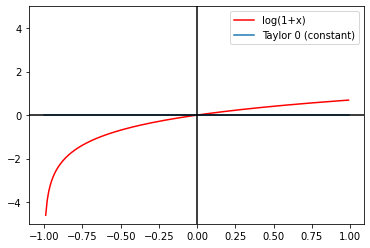

In [45]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-1,1,0.01)
p_exp = np.log(values+1)
t_exp1 = [taylor(log(1+x), 0, 1).subs(x,v) for v in values]
legends = ['log(1+x) ','Taylor 0 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


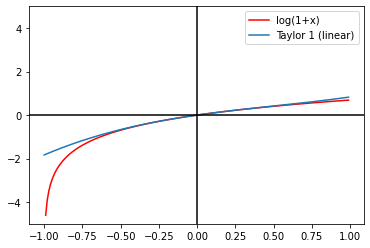

In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-1,1,0.01)
p_exp = np.log(values+1)
t_exp2 = [taylor(log(1+x), 0, 2).subs(x,v) for v in values]
legends = ['log(1+x) ','Taylor 1 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


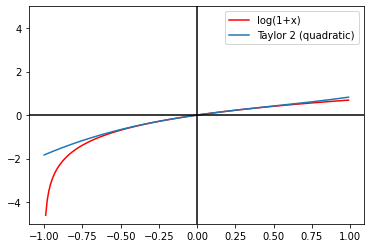

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-1,1,0.01)
p_exp = np.log(values+1)
t_exp3 = [taylor(log(1+x), 0, 3).subs(x,v) for v in values]
legends = ['log(1+x) ','Taylor 2 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


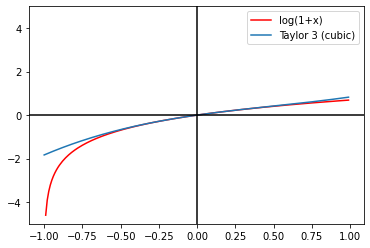

In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-1,1,0.01)
p_exp = np.log(values+1)
t_exp4 = [taylor(log(1+x), 0, 4).subs(x,v) for v in values]
legends = ['log(1+x) ','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_exp, color ='red')
ax.plot(values,t_exp1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


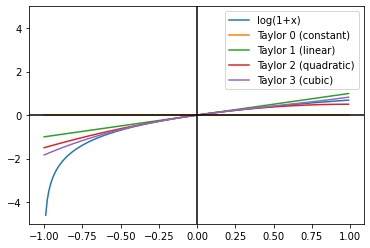

In [54]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-1,1,0.01)
p_exp = np.log(values+1)
t_exp1 = [taylor(log(1+x), 0, 1).subs(x,v) for v in values]
t_exp2 = [taylor(log(1+x), 0, 2).subs(x,v) for v in values]
t_exp3 = [taylor(log(1+x), 0, 3).subs(x,v) for v in values]
t_exp4 = [taylor(log(1+x), 0, 4).subs(x,v) for v in values]

legends = ['log(1+x) ','Taylor 0 (constant)','Taylor 1 (linear)','Taylor 2 (quadratic)','Taylor 3 (cubic)']


fig, ax = plt.subplots()
ax.plot(values,p_exp)
ax.plot(values,t_exp1)
ax.plot(values,t_exp2)
ax.plot(values,t_exp3)
ax.plot(values,t_exp4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

$$ f(x) = sin(x) $$

**1) Animación con Sagemath**



```python
# Interact Taylor Series of $$f(x) = sin(x)$$
# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -20, 20, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -20, 20, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=10)

# Animate  Taylor Series of $$f(x) = sin(x)$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -pi, pi, thickness=2,legend_label='f(x) = sin(x)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -pi,pi, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('sin(x)_taylor_animation_1.gif')
```



![Sage Image](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab9/images/sin(x)_taylor_animation_1.gif?raw=true)

**2) Evaluación del error**

## Taylor series of $ln(x+1)$

$$ ln(x+1) = \sum_{n=0}^{\infty} (-1)^{n-1} \frac{(n+1)!}{(1+x)^{n}} $$